In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

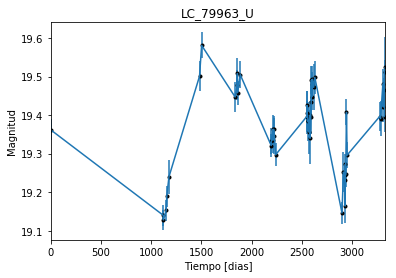

In [2]:
data = np.genfromtxt('LC_79963_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_79963_U')
plt.savefig("LC_79963_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

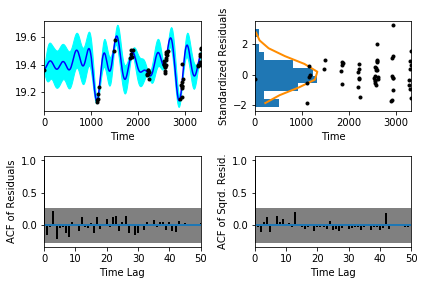

In [5]:
sample.assess_fit()

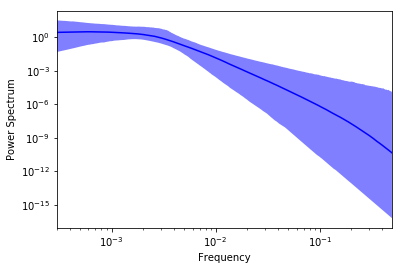

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

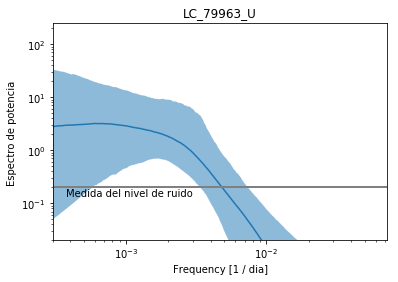

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_79963_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_79963_U')

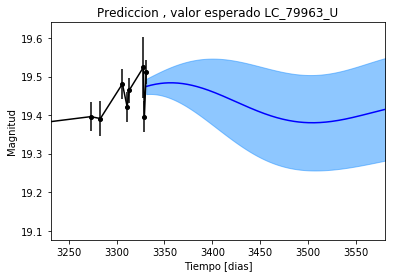

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_79963_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_79963_U')

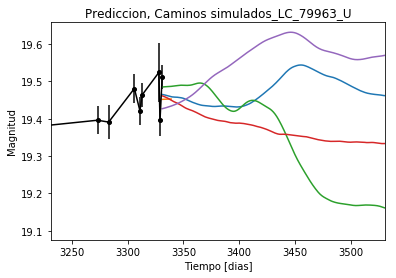

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_79963_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


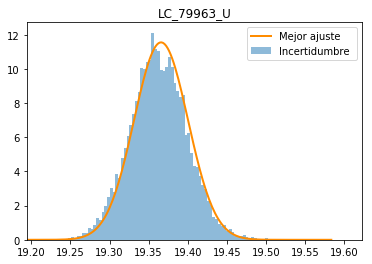

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_79963_U')
plt.savefig("Mejor_ajuste_LC_79963_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_79963_U')

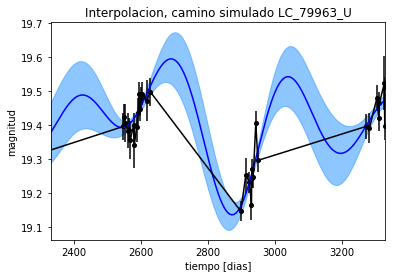

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_79963_U')

Text(0.5,1,'Interpolacion, camino simulado LC_79963_U')

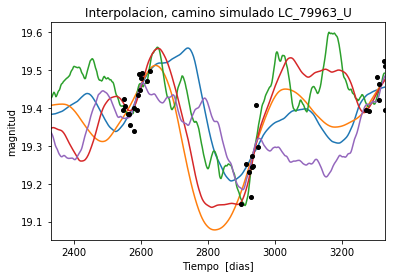

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_79963_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 829.337315283
Median: 0.00653258010226
Standard deviation: 0.159467949086
68% credibility interval: [ 0.00069607  0.12961138]
95% credibility interval: [  3.36638241e-04   6.17132908e-01]
99% credibility interval: [  3.11769896e-04   9.09576346e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 771.72081975
Median: 0.00210293688511
Standard deviation: 0.0947380293876
68% credibility interval: [ 0.0005575   0.04587117]
95% credibility interval: [  3.29112649e-04   3.30189526e-01]
99% credibility interval: [  3.08044462e-04   6.02582369e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 417.868496389
Median: 0.0082159072920

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 949.069081115
Median: 97.6116705402
Standard deviation: 1.70069437735
68% credibility interval: [ 95.7835654   98.97441269]
95% credibility interval: [ 93.2801967   99.75059773]
99% credibility interval: [  91.27013448  100.42990647]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 726.623185337
Median: 0.499069519912
Standard deviation: 1.87208550147
68% credibility interval: [ 0.0517403   3.04401908]
95% credibility interval: [ 0.01342618  6.3819527 ]
99% credibility interval: [  9.00740997e-03   9.11197898e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 590.908552649
Median: 0.225192700082
Standard deviation: 8.30818718057
68% credibility interval: [  7.08949172e-03   9.14702091e+00]
95% credibility interv

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2052.89160349
Median: 9.12386270963e-17
Standard deviation: 2.13893517191e+75
68% credibility interval: [  6.00874970e-59   9.18362424e+46]
95% credibility interval: [  2.28969426e-140   7.11352559e+058]
99% credibility interval: [  6.32117668e-179   2.85263513e+063]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3471.79013549
Median: 19.3766305098
Standard deviation: 0.0554679009573
68% credibility interval: [ 19.32942257  19.42244156]
95% credibility interval: [ 19.26102282  19.48624764]
99% credibility interval: [ 19.1935648   19.55096182]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 495.856798178
Median: 0.00494622005053
Standard deviation: 0.248562186389
68% credibility interval: [ 0.          0.40423685]
95% credibility interval: [ 0.         0.8538411]
99% credibility interval: [ 0.          0.95734657]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 495.856798178
Median: 0.00494622005053
Standard deviation: 0.248562186389
68% credibility interval: [ 0.          0.40423685]
95% credibility interval: [ 0.         0.8538411]
99% credibility interval: [ 0.          0.95734657]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 946.151480453
Median: 0.0
Standard deviation: 0.00108062109634
68% credi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 949.069081115
Median: 97.6116705402
Standard deviation: 1.70069437735
68% credibility interval: [ 95.7835654   98.97441269]
95% credibility interval: [ 93.2801967   99.75059773]
99% credibility interval: [  91.27013448  100.42990647]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2385.55763147
Median: 0.0193727214212
Standard deviation: 0.0196318999405
68% credibility interval: [ 0.01213823  0.03429583]
95% credibility interval: [ 0.0081574   0.06847177]
99% credibility interval: [ 0.00620414  0.12455581]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1426.60797175
Median: 0.985304909456
Standard deviation: 0.158261335119
68% credibility interval: [ 0.84838712  1.15213139]
95% credibility interval: [ 0.73422543  1.35228949]
99% credibility interval: [ 0.66468984  1.51389407]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1523.1853078
Median: 4.82090642851e-05
Standard deviation: 0.0669029896838
68% credibility interval: [  5.13460932e-52   4.65414947e-03]
95% credibility interval: [  5.55203084e-63   4.55291869e-02]
99% credibility interval: [  1.98242281e-67   2.75461944e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 829.337315283
Median: (-0.0410454113165-0.0157681345579j)
Standard deviation: 1.85554267759
68% credibility interval: [-0.81437229+0.j         -0.00437354-0.00537007j]
95% credibility interval: [ -3.87756042e+00+0.j          -2.11516045e-03-0.02517061j]
99% credibility interval: [ -5.71503673e+00+0.j          -1.95890803e-03-3.59806671j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 771.72081975
Median: (-0.0132131421384+0.0173870314106j)
Standard deviation: 1.67135628287
68% credibility interval: [-0.28821708+1.504721j   -0.00350290+0.02530445j]
95% credibility interval: [ -2.07464198e+00+2.39517234j  -2.06787576e-03+0.0194818j ]
99% credibility interval: [ -3.78613669e+00+4.58493204j  -1.93550044e-03+0.01815509j]
P